In [1]:
import keras
keras.__version__


'3.8.0'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Updated import
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import AveragePooling2D # Updated import
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Updated import
from sklearn.model_selection import train_test_split

In [3]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download dansbecker/food-101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.36G/9.38G [01:52<00:00, 103MB/s]
100% 9.38G/9.38G [01:52<00:00, 89.5MB/s]


In [5]:
!unzip -o /content/food-101.zip -d /content/food-101

Streaming output truncated to the last 5000 lines.
  inflating: /content/food-101/food-101/food-101/images/tacos/1033196.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1036030.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1042175.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1044043.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1058697.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1059239.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1059326.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1066762.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1070967.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1073468.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1075296.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1085243.jpg  
  inflating: /content/food-101/food-1

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# Define image size and batch size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Define the data generators with correct validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Load training data
train_data = train_datagen.flow_from_directory(
    "/content/food-101/food-101/food-101/images/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    "/content/food-101/food-101/food-101/images/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Save class indices for correct label mapping
class_indices = train_data.class_indices
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [7]:
import os
print(os.listdir("/content/food-101"))

['food-101.zip', 'food-101']


In [8]:

print(os.listdir("/content/food-101/food-101/food-101/images/"))

['tiramisu', 'bibimbap', 'hamburger', 'bread_pudding', 'deviled_eggs', 'pad_thai', 'hot_and_sour_soup', 'escargots', 'donuts', 'pizza', 'clam_chowder', 'frozen_yogurt', 'huevos_rancheros', 'chicken_wings', 'takoyaki', 'edamame', 'caesar_salad', 'nachos', 'macaroni_and_cheese', 'eggs_benedict', 'omelette', 'shrimp_and_grits', 'mussels', 'baby_back_ribs', 'spring_rolls', 'scallops', 'ceviche', 'samosa', 'strawberry_shortcake', 'gyoza', 'guacamole', 'chocolate_mousse', 'carrot_cake', 'pork_chop', 'tacos', 'french_toast', 'french_fries', 'beet_salad', 'onion_rings', 'beignets', 'lobster_bisque', 'red_velvet_cake', 'panna_cotta', 'pulled_pork_sandwich', 'poutine', 'spaghetti_bolognese', 'chicken_quesadilla', 'breakfast_burrito', 'chicken_curry', 'spaghetti_carbonara', 'french_onion_soup', 'ravioli', 'hot_dog', 'steak', 'fried_rice', 'club_sandwich', 'apple_pie', 'cannoli', 'cup_cakes', 'tuna_tartare', 'paella', 'ice_cream', 'caprese_salad', 'foie_gras', 'garlic_bread', 'falafel', 'peking_du

In [9]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)


['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [10]:
print("Number of classes:",len(values))

Number of classes: 101


In [11]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."


In [12]:
len(calories)

101

In [13]:
calories[0]

'Apple Pie: ~2.5 calories per gram'

In [14]:
print("First element:",values[0],"\nLast element:",values[-1])


First element: apple_pie 
Last element: waffles


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [16]:
print('\nBatch Size:',100,
     "\nNunmber of Batches in training set:",len(train_data),
     "\nNunmber of Batches in testing set:",len(test_data),
     "\nNumber of Samples in training set:",train_data.samples,"Samples",
     "\nNumber of Samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Nunmber of Batches in training set: 909 
Nunmber of Batches in testing set: 101 
Number of Samples in training set: 90900 Samples 
Number of Samples in testing set: 10100 Samples


In [17]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")



The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [19]:
np.unique(test_data.labels)




array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [20]:
np.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [21]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [22]:
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
# base_model.summary()



74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
for layer in base_model.layers[:]:
  layer.trainable = False

In [24]:
from keras.models import Sequential
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(101, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 7, 7, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 94080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │      94,081,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 101)                 │         101,101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,505,085 (432.99 MB)

 Trainable params: 95,183,101 (363.09 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [25]:

len(test_data)

101

In [26]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Efficient Early Stopping
early_stopping = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)

results = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data) // 2,  # Reduce steps per epoch
    validation_steps=len(test_data) // 2,  # Reduce validation steps
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


454/454 ━━━━━━━━━━━━━━━━━━━━ 339s 607ms/step - accuracy: 0.1958 - loss: 8.0299 - val_accuracy: 0.4038 - val_loss: 2.3426
Epoch 2/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 246s 541ms/step - accuracy: 0.4813 - loss: 2.0173 - val_accuracy: 0.4494 - val_loss: 2.1180
Epoch 3/5
  1/454 ━━━━━━━━━━━━━━━━━━━━ 2:52 380ms/step - accuracy: 0.5600 - loss: 1.8997

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


454/454 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.5600 - loss: 1.8997 - val_accuracy: 0.4488 - val_loss: 2.1152
Epoch 4/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 220s 483ms/step - accuracy: 0.5480 - loss: 1.7367 - val_accuracy: 0.4902 - val_loss: 2.0193
Epoch 5/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 260s 574ms/step - accuracy: 0.5855 - loss: 1.5553 - val_accuracy: 0.4894 - val_loss: 2.0470


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
loss , acc = model.evaluate(test_data)

101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.4702 - loss: 2.1219


In [30]:
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

Test accuracy: 49.370000000000005 % 
Loss value: 2.0051586627960205


In [31]:
results.history['val_accuracy']

[0.40380001068115234,
 0.44940000772476196,
 0.4487999975681305,
 0.490200012922287,
 0.4893999993801117]

In [36]:
results.history['val_loss']

[2.342634677886963,
 2.1180179119110107,
 2.115234613418579,
 2.0192532539367676,
 2.0469987392425537]

In [41]:
import numpy as np

# Convert list to NumPy array
val_loss_array = np.array(results.history['val_loss'])

# Target value
target_value = 2.081359386444092

# Find the index of the closest value
i = np.argmin(np.abs(val_loss_array - target_value))

print(f"Closest value: {val_loss_array[i]} at index {i}")


Closest value: 2.115234613418579 at index 2


In [42]:
results.history['val_accuracy'][i]

0.4487999975681305

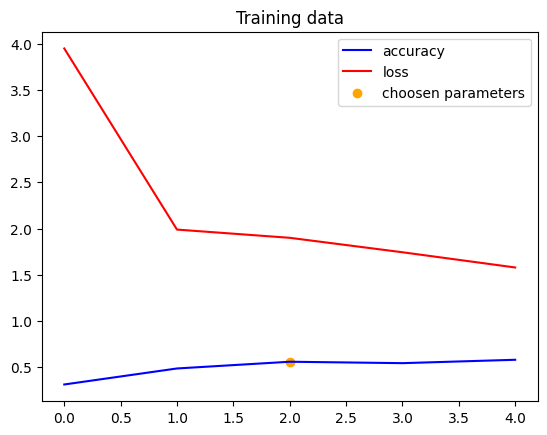

In [43]:

fig = plt.figure()
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['loss'], c='red', label='loss')
plt.scatter(i,results.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()


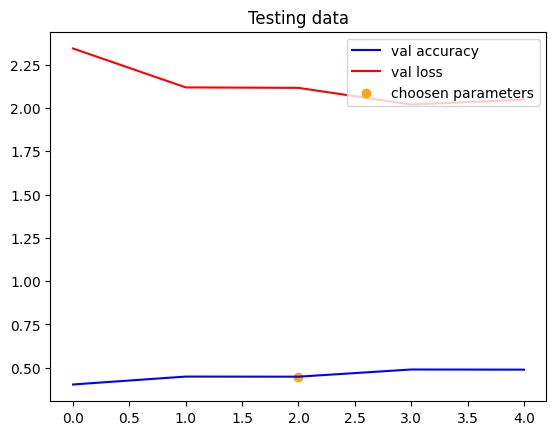

In [44]:
fig = plt.figure()
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

In [45]:
model.save("foodmodel.h5")


In [52]:

# Load the trained model
model = tf.keras.models.load_model("foodmodel.h5" ,compile=False)

# Ensure the model is compiled (fix warning)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load class indices mapping
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Reverse the dictionary to get class labels from indices
index_to_label = {v: k for k, v in class_indices.items()}

# Define calorie mapping
calorie_mapping = {
    "apple_pie": 2.5,
    "baby_back_ribs": 3.5,
    "baklava": 5.0,
    "beef_carpaccio": 2.0,
    "beef_tartare": 2.5,
    "beet_salad": 0.5,
    "beignets": 3.5,
    "bibimbap": 1.5,
    "bread_pudding": 2.5,
    "breakfast_burrito": 2.0,
    "bruschetta": 1.0,
    "caesar_salad": 0.5,
    "cannoli": 3.5,
    "caprese_salad": 1.0,
    "carrot_cake": 3.5,
    "ceviche": 0.5,
    "cheese_plate": 3.5,
    "cheesecake": 3.5,
    "chicken_curry": 1.5,
    "chicken_quesadilla": 2.5,
    "chicken_wings": 3.0,
    "chocolate_cake": 4.0,
    "chocolate_mousse": 3.0,
    "churros": 4.0,
    "clam_chowder": 1.5,
    "club_sandwich": 2.5,
    "crab_cakes": 2.0,
    "creme_brulee": 3.5,
    "croque_madame": 3.0,
    "cup_cakes": 3.5,
    "deviled_eggs": 1.0,
    "donuts": 4.0,
    "dumplings": 2.5,
    "edamame": 1.0,
    "eggs_benedict": 2.5,
    "escargots": 1.0,
    "falafel": 2.0,
    "filet_mignon": 2.5,
    "fish_and_chips": 2.5,
    "foie_gras": 4.5,
    "french_fries": 3.5,
    "french_onion_soup": 1.0,
    "french_toast": 2.0,
    "fried_calamari": 2.5,
    "fried_rice": 1.5,
    "frozen_yogurt": 1.0,
    "garlic_bread": 4.0,
    "gnocchi": 1.5,
    "greek_salad": 0.5,
    "grilled_cheese_sandwich": 3.0,
    "grilled_salmon": 2.0,
    "guacamole": 2.0,
    "gyoza": 2.0,
    "hamburger": 3.5,
    "hot_and_sour_soup": 0.5,
    "hot_dog": 3.5,
    "huevos_rancheros": 2.0,
    "hummus": 1.5,
    "ice_cream": 2.0,
    "lasagna": 1.5,
    "lobster_bisque": 1.0,
    "lobster_roll_sandwich": 2.5,
    "macaroni_and_cheese": 3.0,
    "macarons": 4.0,
    "miso_soup": 0.5,
    "mussels": 0.5,
    "nachos": 2.5,
    "omelette": 1.5,
    "onion_rings": 2.5,
    "oysters": 0.5,
    "pad_thai": 2.0,
    "paella": 1.5,
    "pancakes": 2.0,
    "panna_cotta": 3.5,
    "peking_duck": 4.0,
    "pho": 1.0,
    "pizza": 2.5,
    "pork_chop": 2.5,
    "poutine": 2.5,
    "prime_rib": 2.5,
    "pulled_pork_sandwich": 2.5,
    "ramen": 1.0,
    "ravioli": 1.5,
    "red_velvet_cake": 4.0,
    "risotto": 1.5,
    "samosa": 2.0,
    "sashimi": 1.0,
    "scallops": 1.0,
    "seaweed_salad": 0.5,
    "shrimp_and_grits": 2.0,
    "spaghetti_bolognese": 1.5,
    "spaghetti_carbonara": 2.0,
    "spring_rolls": 1.5,
    "steak": 2.5,
    "strawberry_shortcake": 3.5,
    "sushi": 1.0,
    "tacos": 2.0,
    "takoyaki": 2.5,
    "tiramisu": 3.0,
    "tuna_tartare": 1.5,
    "waffles": 2.0
}

def predict_food(image_path):
    # Load and preprocess the image (Fix input size issue)
    img = load_img(image_path, target_size=(224, 224))  # Ensure correct input size
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for model input

    # Make prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_label = index_to_label[predicted_index]

    # Get calorie information
    estimated_calories = calorie_mapping.get(predicted_label, "Unknown")

    # Display the image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_label}\nCalories: {estimated_calories} cal per gram")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


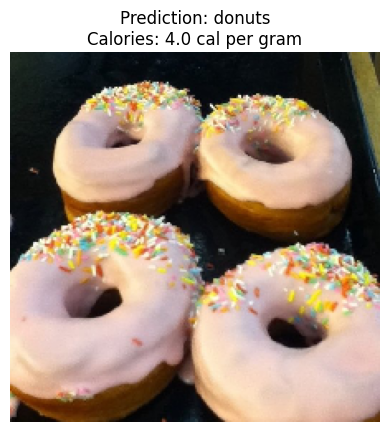

In [53]:

predict_food("/content/food-101/food-101/food-101/images/donuts/1008454.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


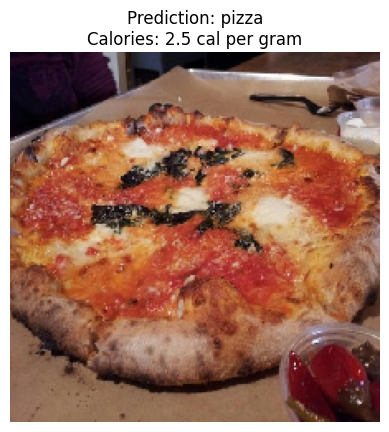

In [54]:

# Example usage:
predict_food("/content/food-101/food-101/food-101/images/pizza/1055065.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


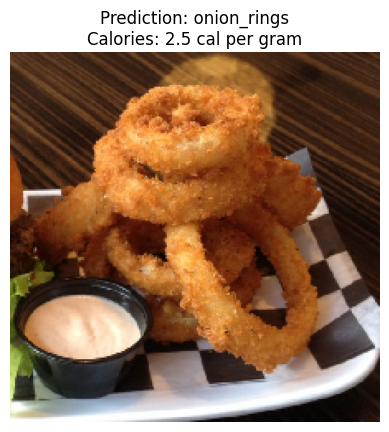

In [60]:

# Example usage:
predict_food("/content/food-101/food-101/food-101/images/onion_rings/1045637.jpg")

# **By🧑‍💻:Rishin Aiyappa A G**